# Load raw data:

In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas #provides data structures to quickly analyze data
#Since this code runs on Kaggle server, train data can be accessed directly in the 'input' folder
dataset = pandas.read_csv('train_forest.csv') 

#Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
dataset = dataset.iloc[:,1:]

In [6]:
pandas.set_option('display.max_columns', None)
dataset.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


# Data statistics

In [5]:
#Shape
print(dataset.shape)

(15120, 55)


In [6]:
# Datatypes of the attributes
print(dataset.dtypes) # Learning : Data types of all attributes has been inferred as int64

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [8]:
# Statistical description

pandas.set_option('display.max_columns', None)
print(dataset.describe())

# Learning :
# No attribute is missing as count is 15120 for all attributes. Hence, all rows can be used
# Negative value(s) present in Vertical_Distance_To_Hydrology. Hence, some tests such as chi-sq cant be used.
# Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis
# Attributes Soil_Type7 and Soil_Type15 can be removed as they are constant
# Scales are not the same for all. Hence, rescaling and standardization may be necessary for some algos

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

In [9]:
# Skewness of the distribution

print(dataset.skew())

# Values close to 0 show less skew
# Several attributes in Soil_Type show a large skew. Hence, some algos may benefit if skew is corrected

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [12]:
# Class distribution

dataset.groupby('Cover_Type').size() # We see that all classes have an equal presence. No class re-balancing is necessary

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

# Data Interaction

In [6]:
# Correlation

import numpy

# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary

#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=dataset.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))  # sorted函数，可以用key这个参数进行排序

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


# Data Interaction

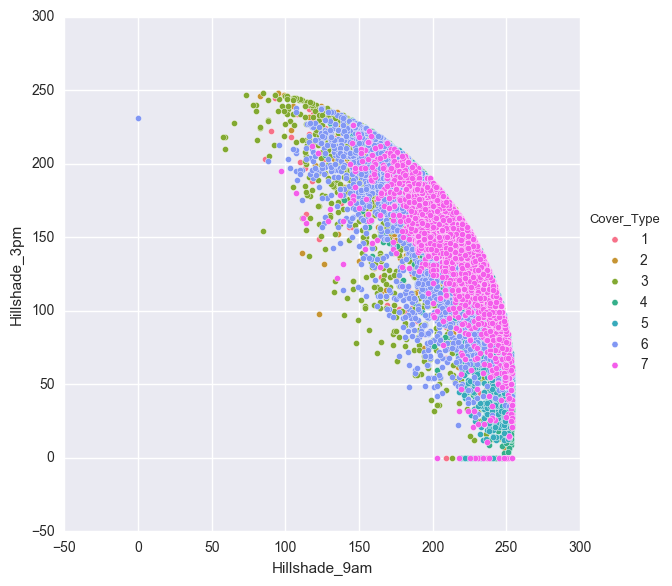

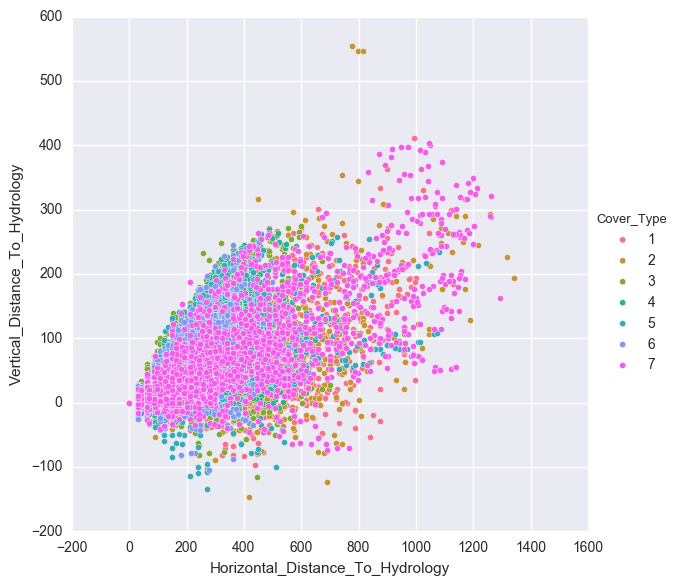

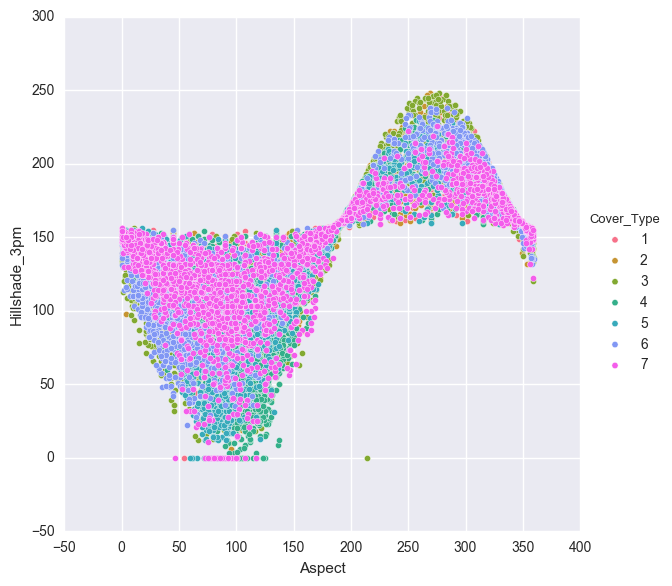

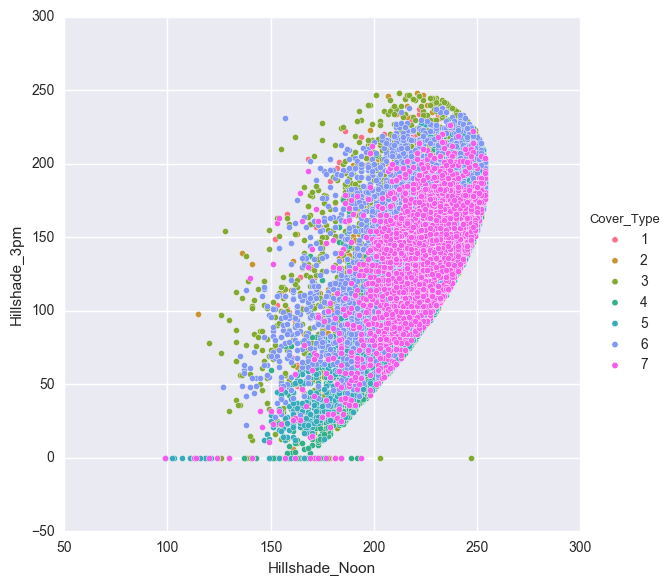

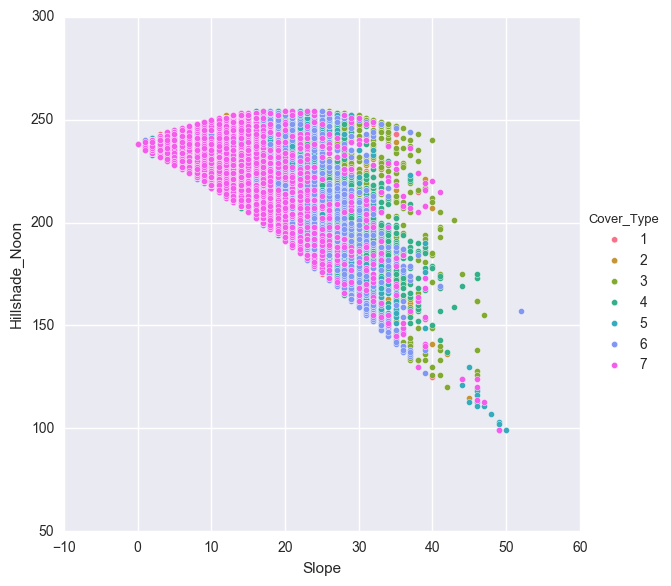

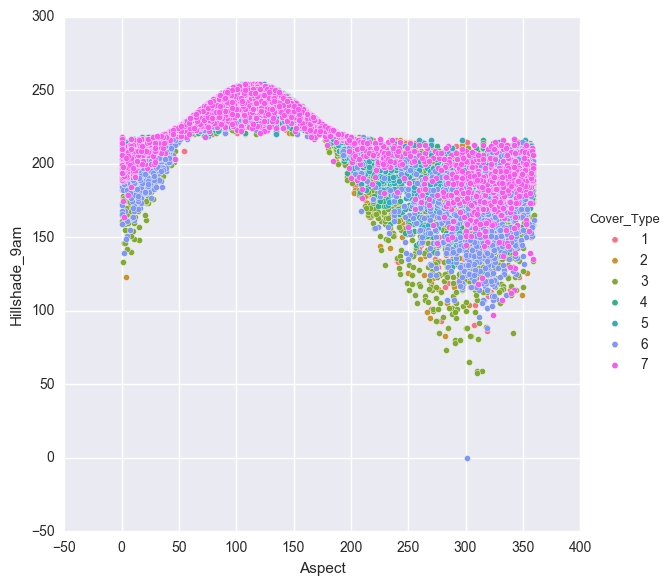

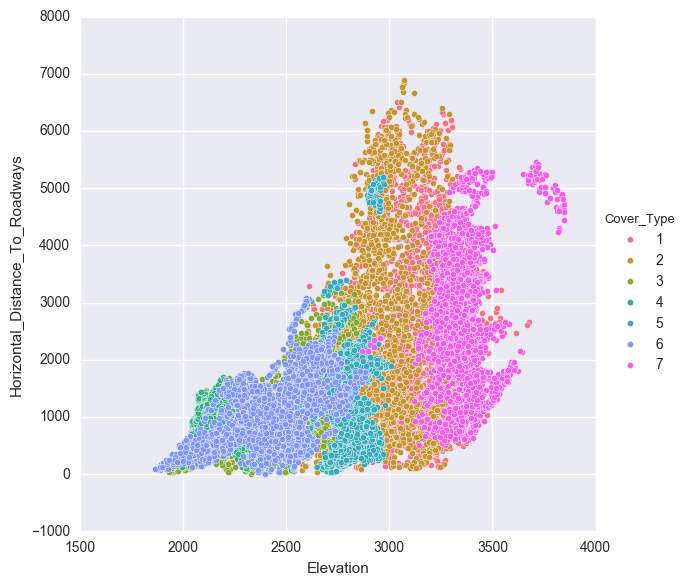

In [7]:
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#The plots show to which class does a point belong to. The class distribution overlaps in the plots.    
#Hillshade patterns give a nice ellipsoid patterns with each other
#Aspect and Hillshades attributes form a sigmoid pattern
#Horizontal and vertical distance to hydrology give an almost linear pattern.

In [8]:
cols = dataset.columns

In [9]:
cols

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type7', u'Soil_Type8',
       u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12',
       u'Soil_Type13', u'Soil_Type14', u'Soil_Type15', u'Soil_Type16',
       u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20',
       u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24',
       u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28',
       u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32',
       u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36',
       u'Soil_

In [13]:
size = len(cols)-1
x = cols[size]
x

'Cover_Type'

# Data Visualization

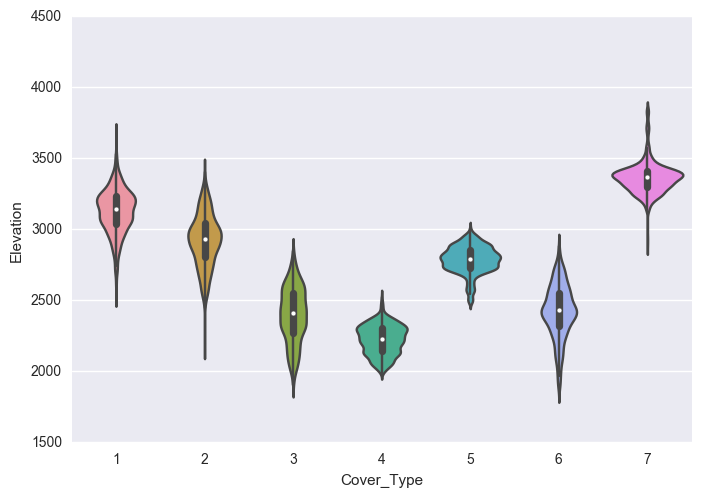

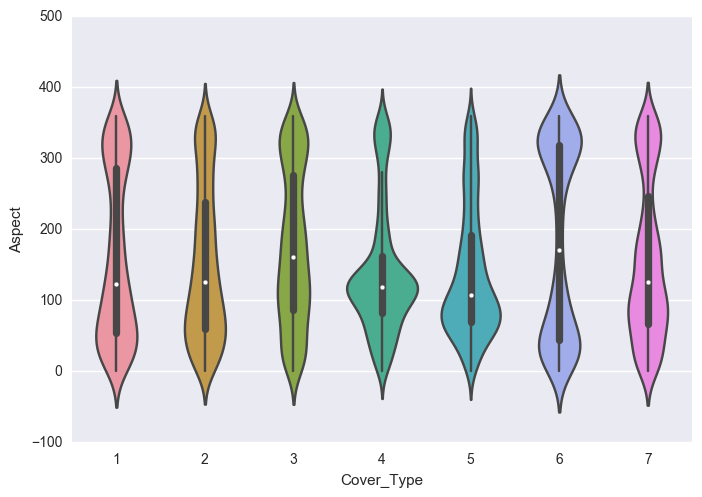

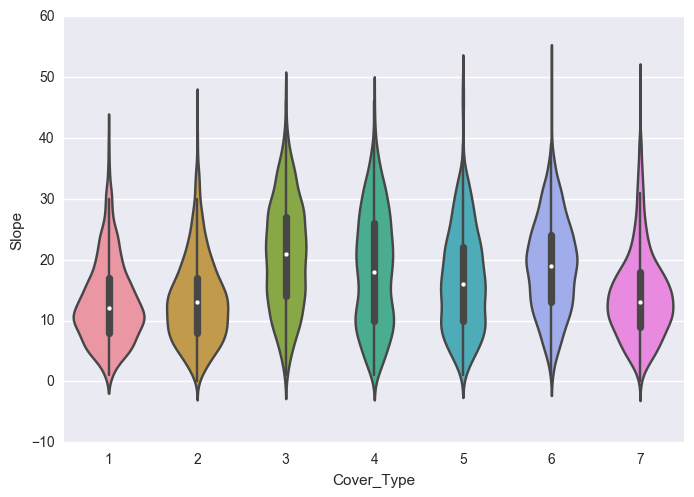

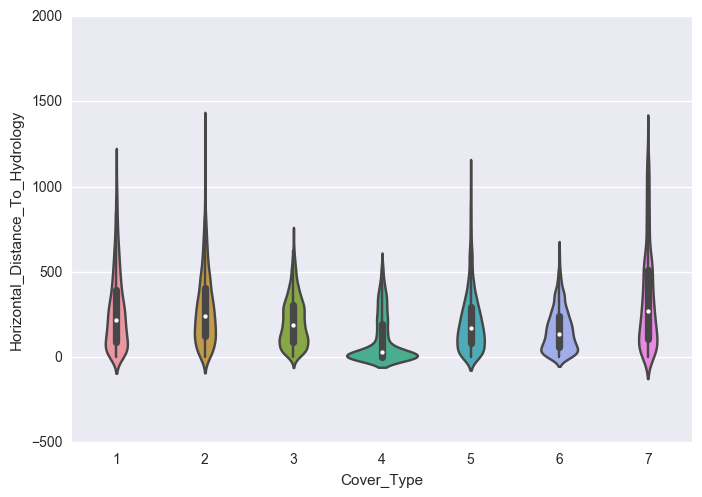

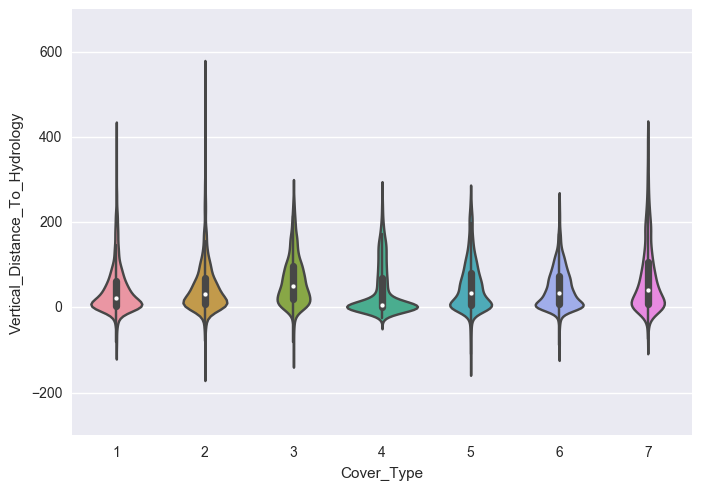

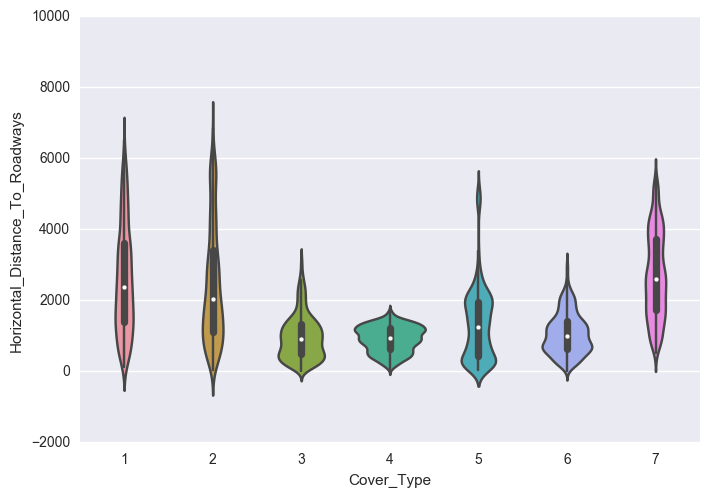

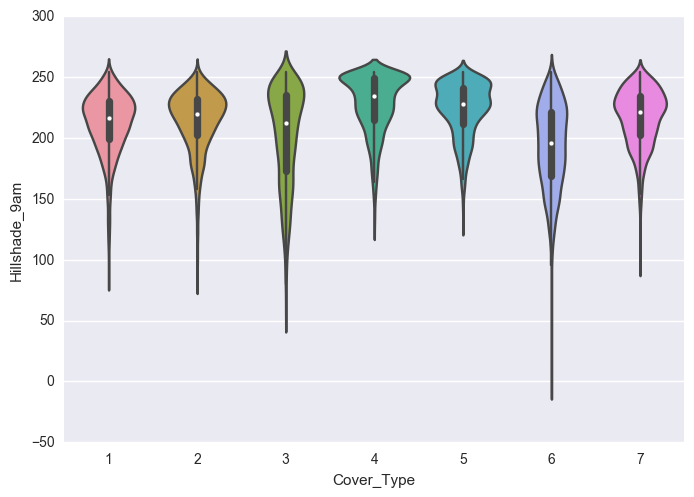

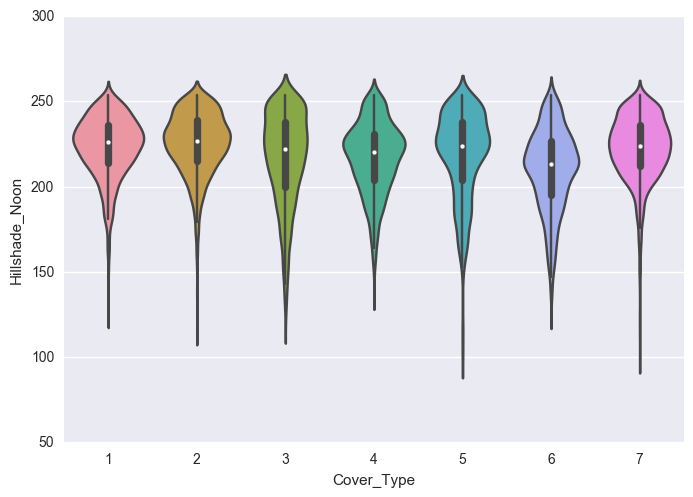

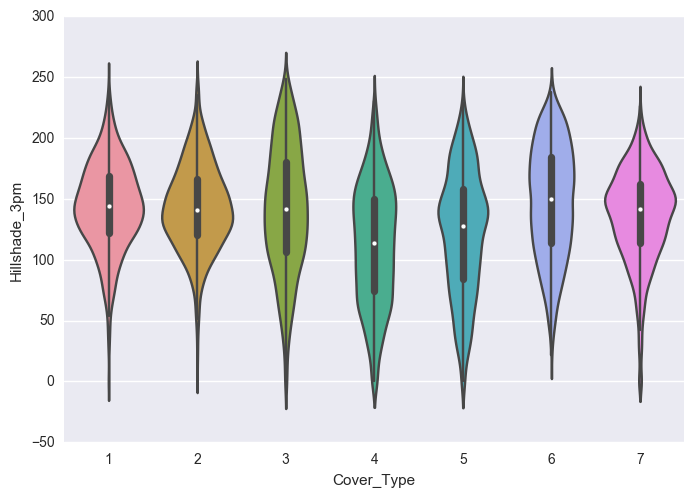

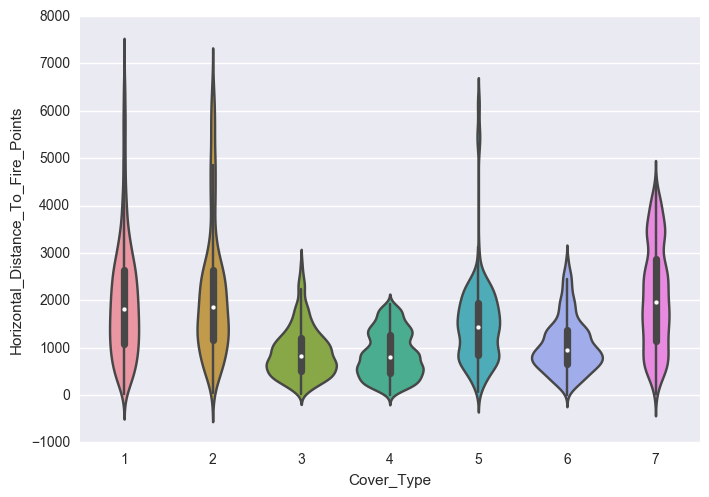

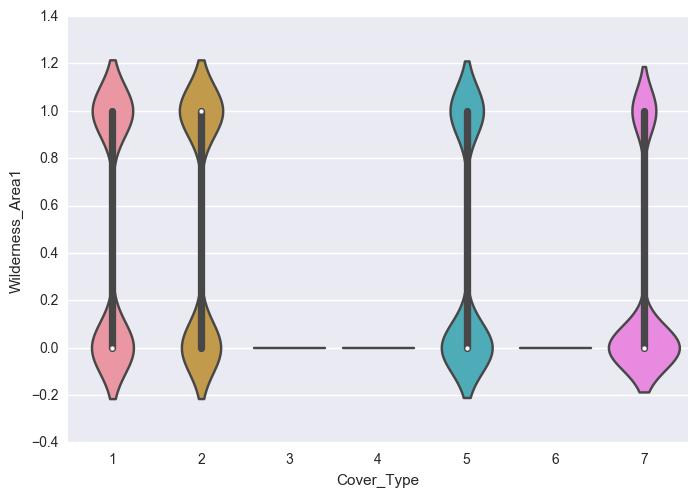

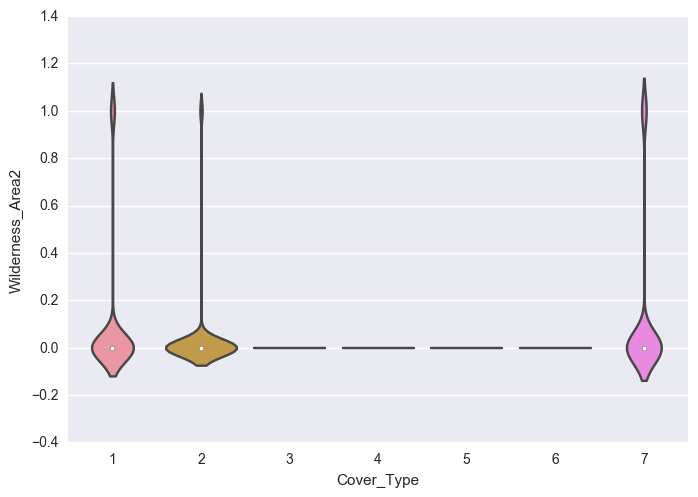

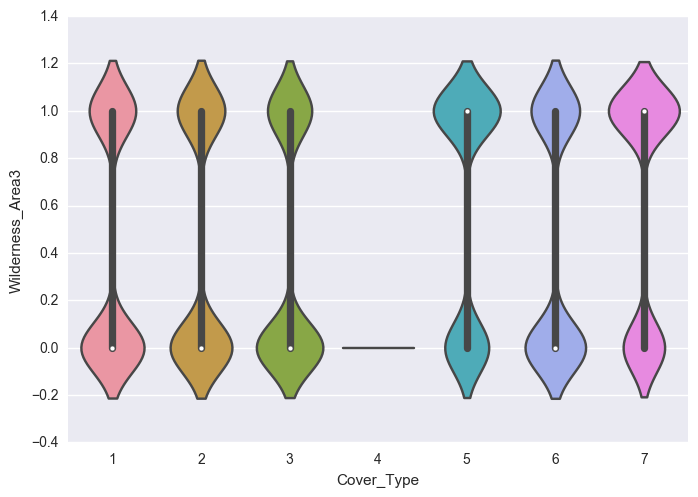

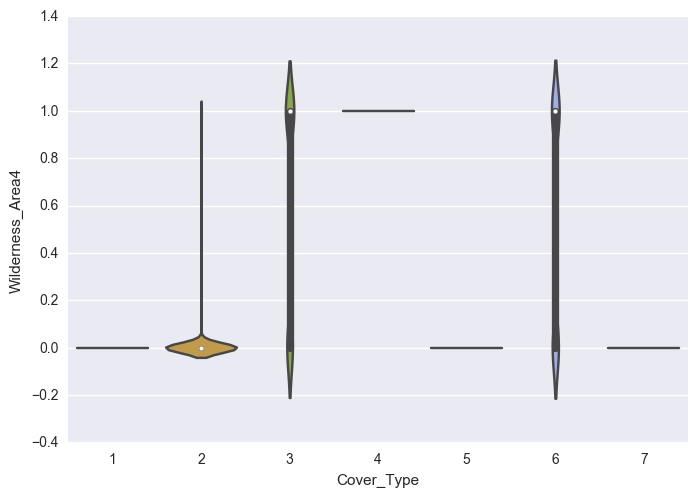

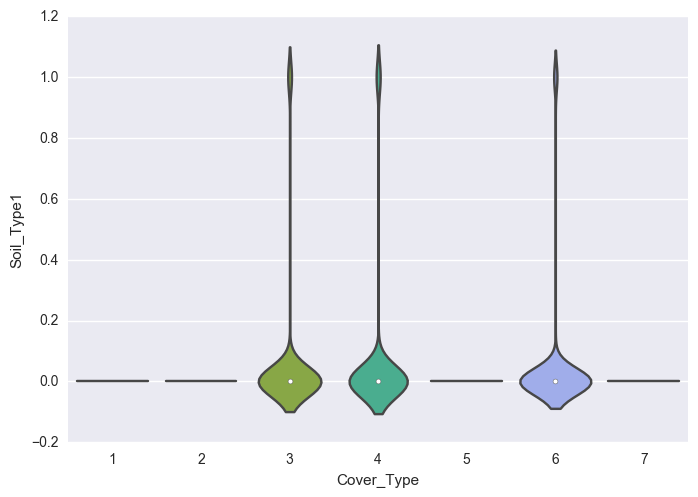

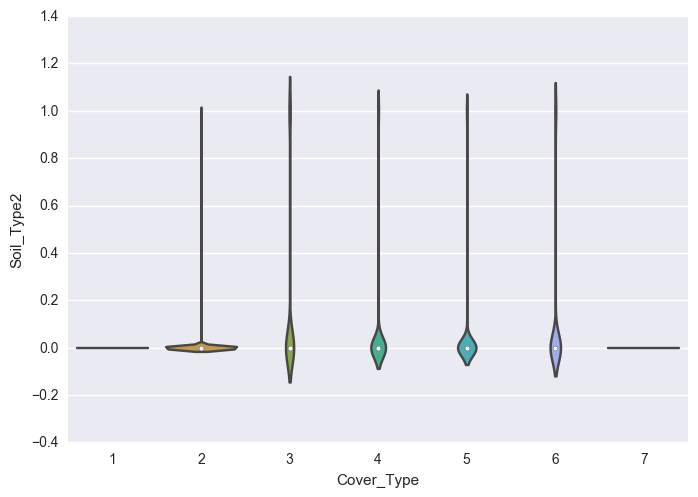

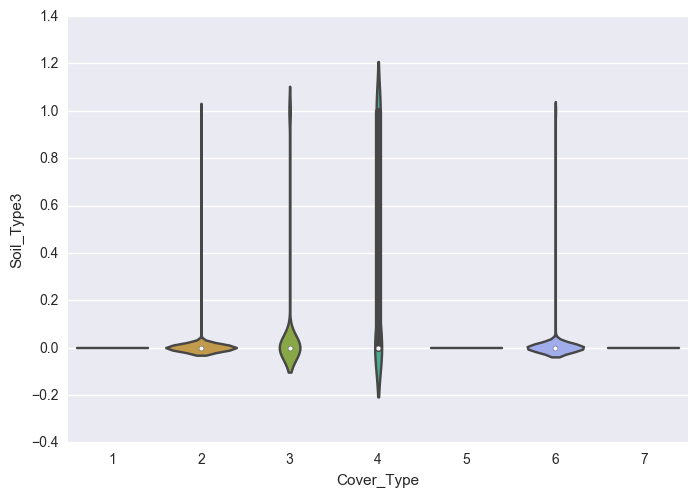

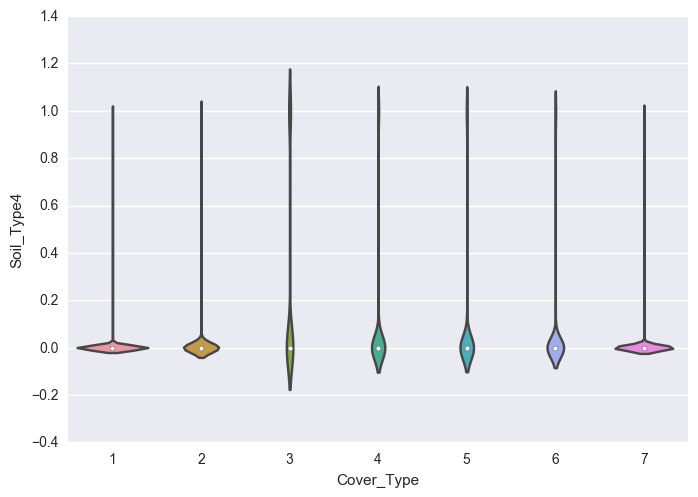

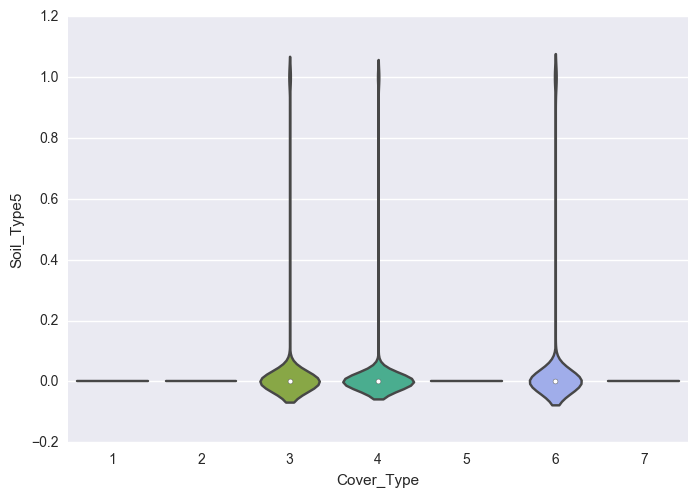

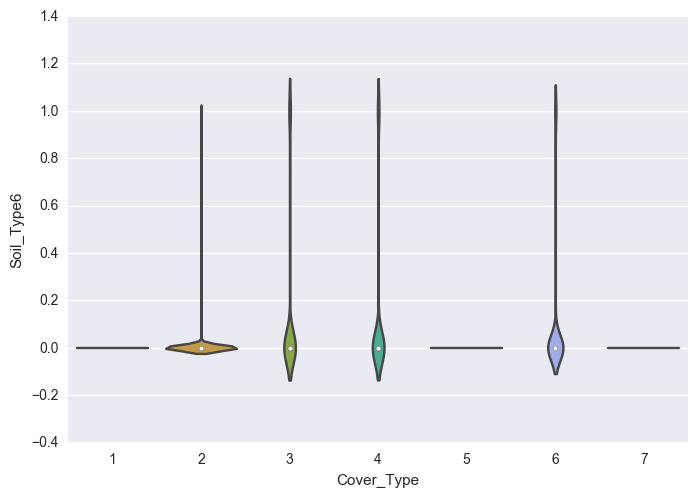

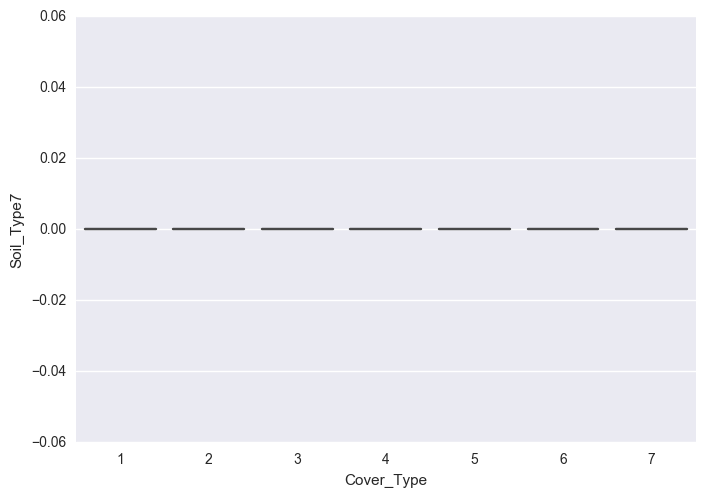

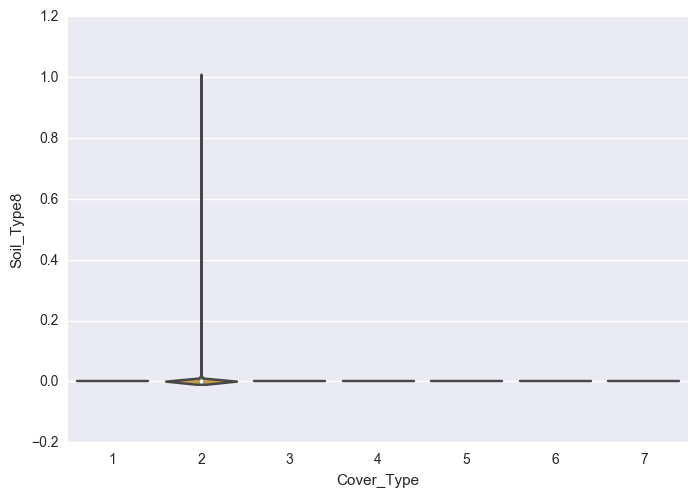

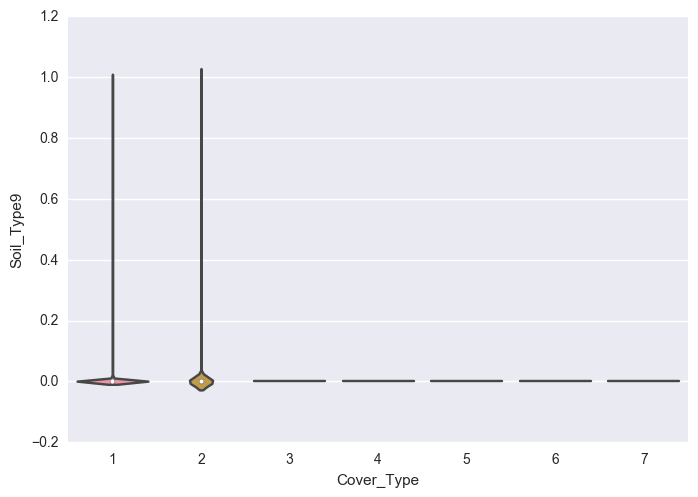

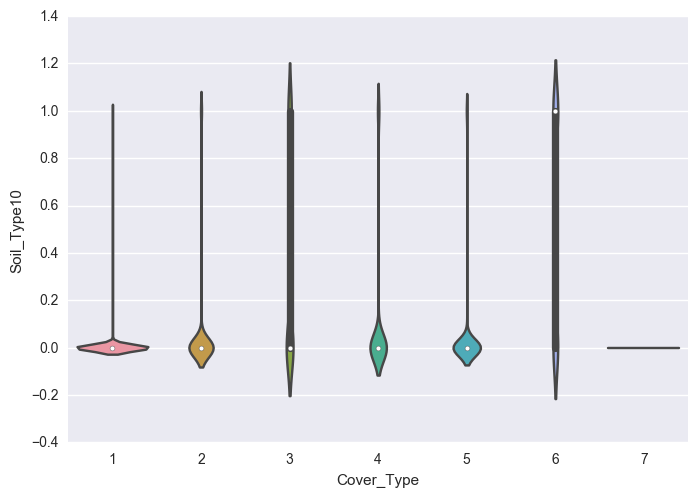

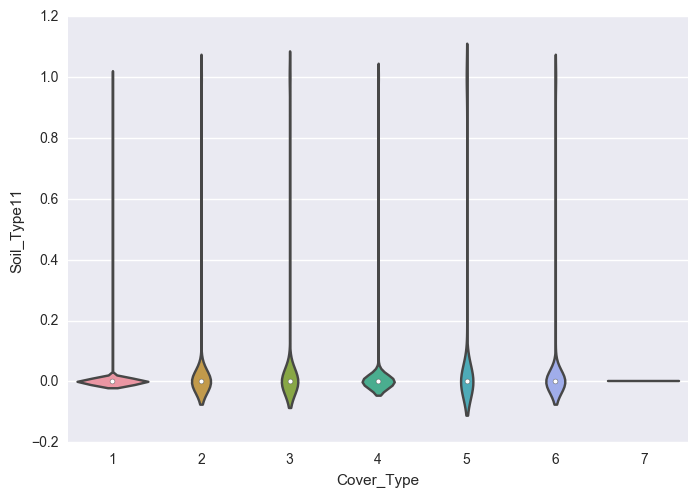

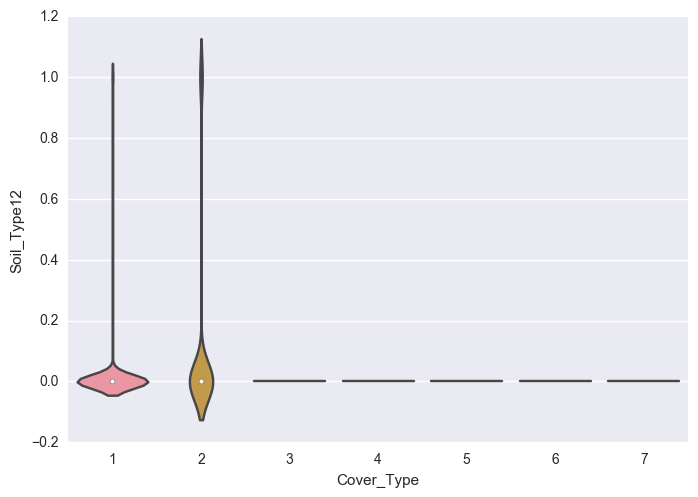

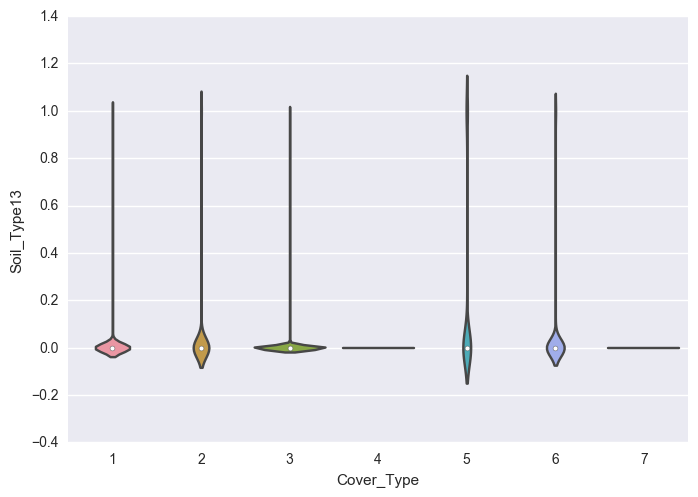

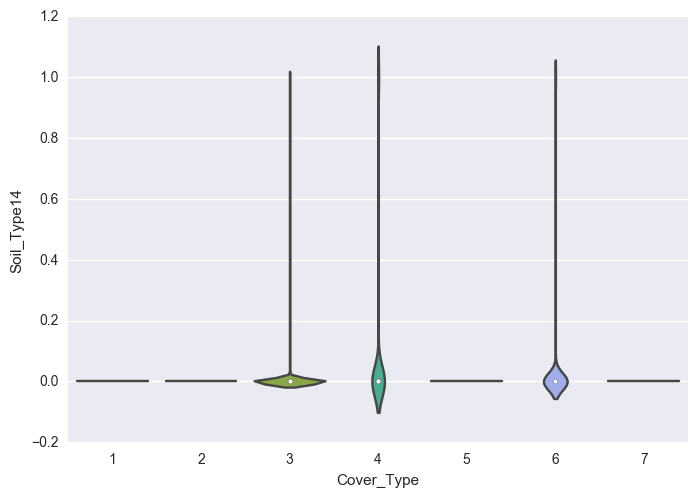

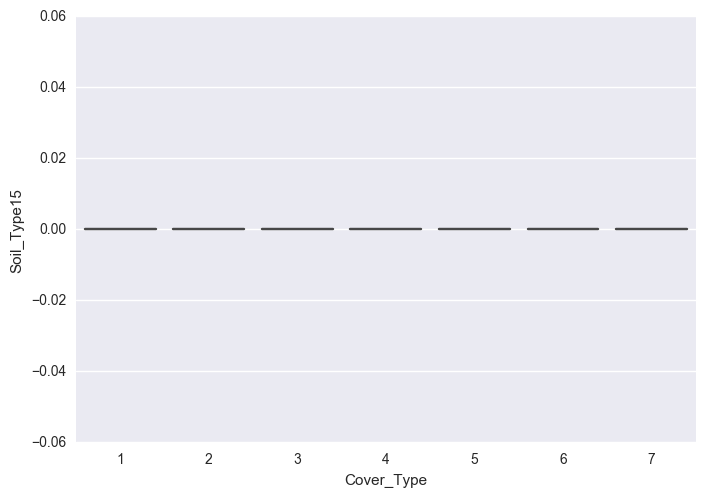

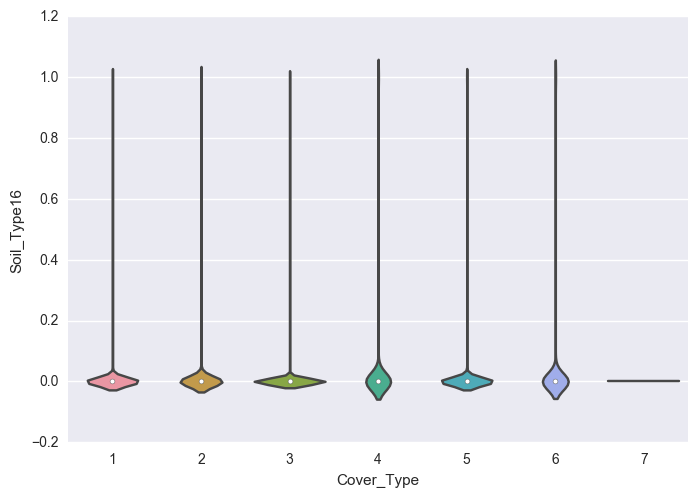

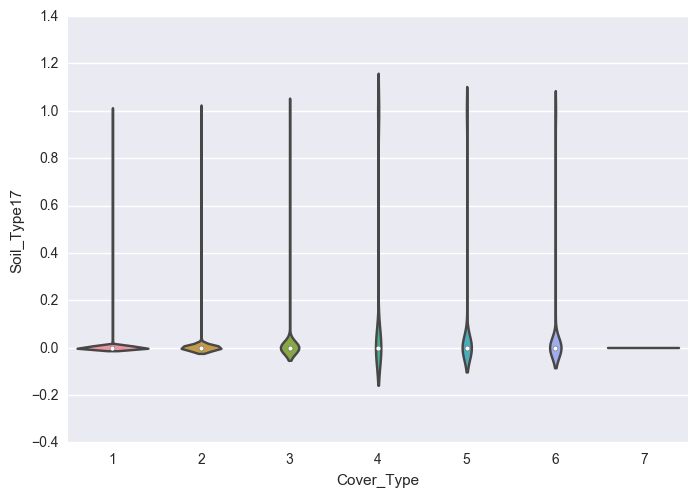

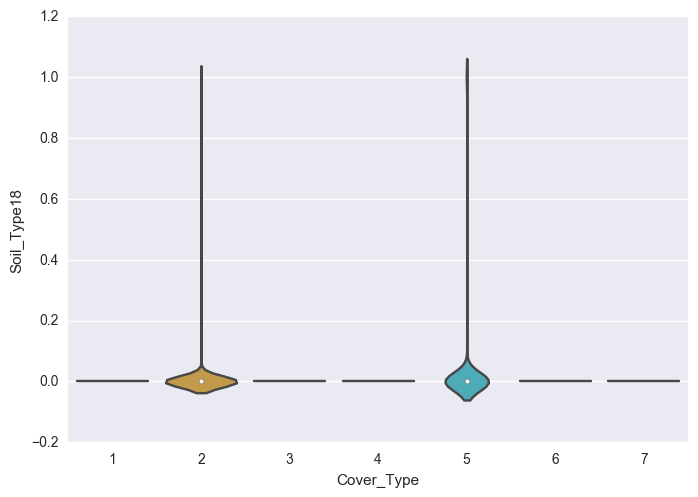

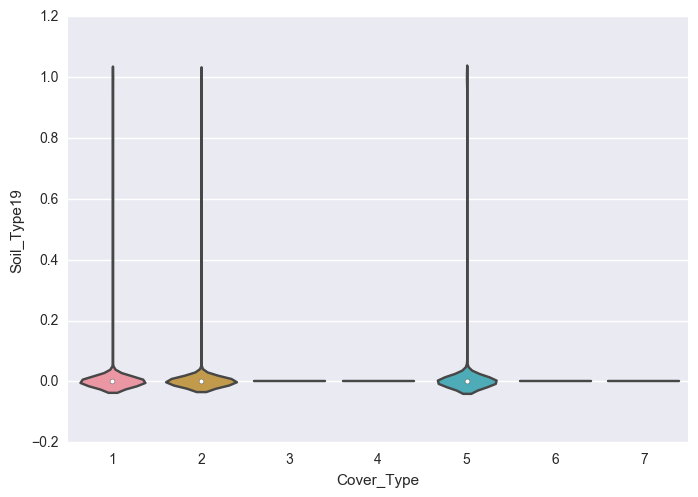

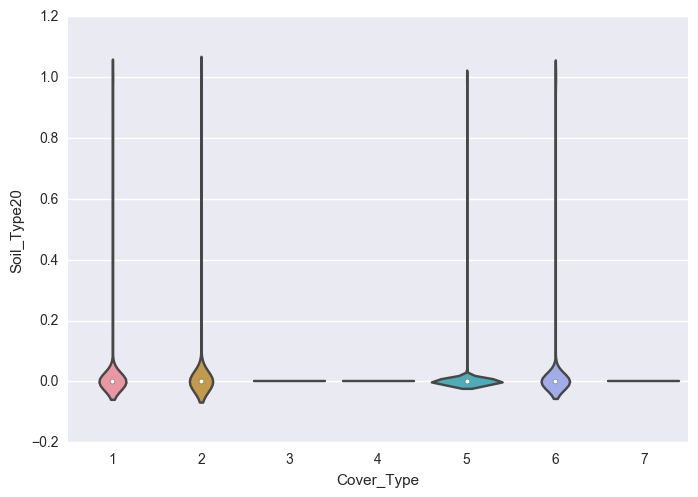

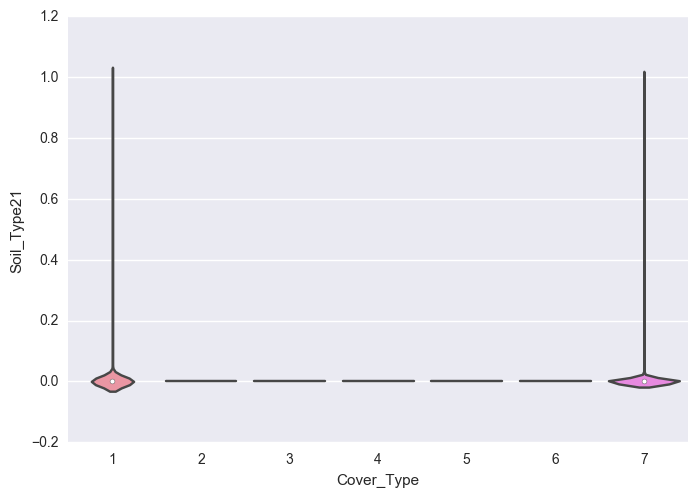

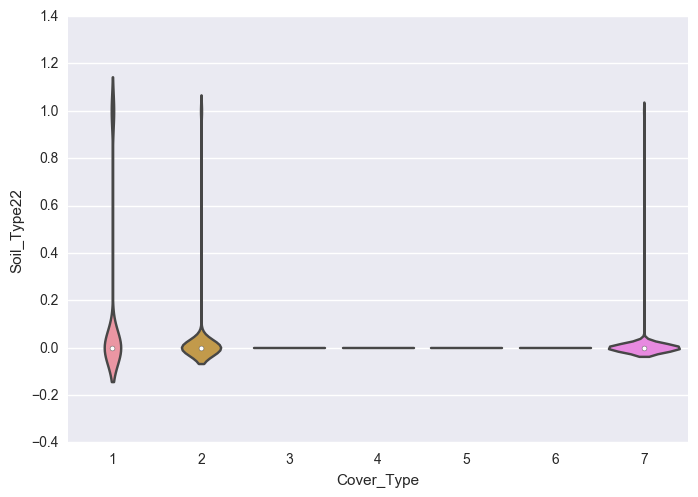

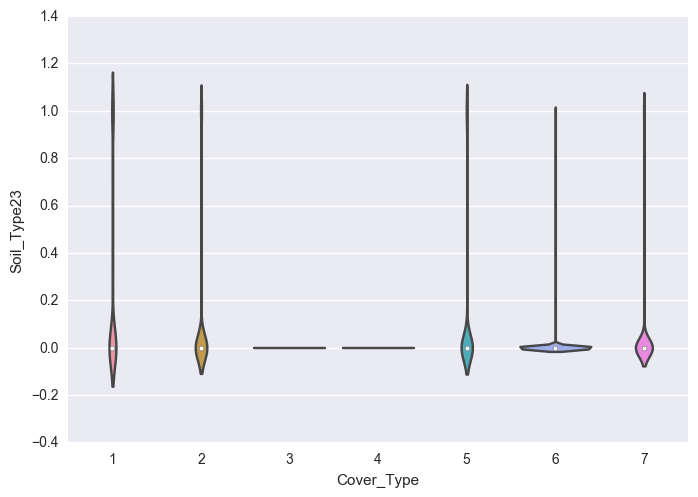

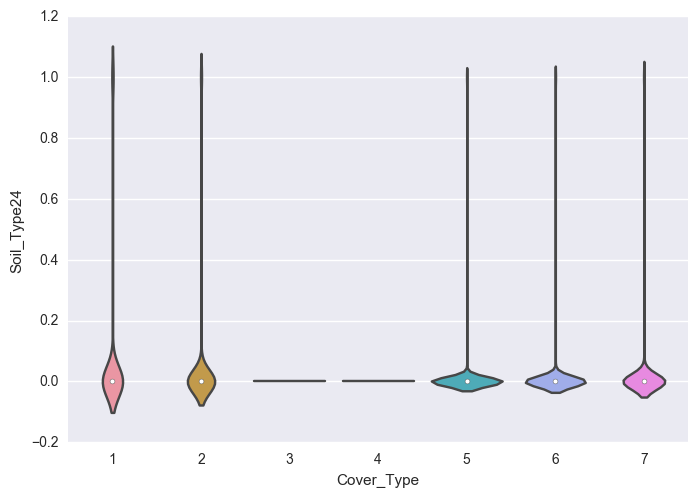

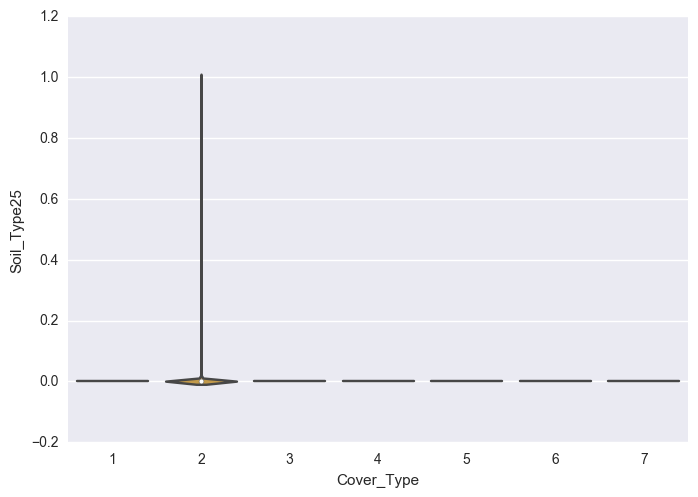

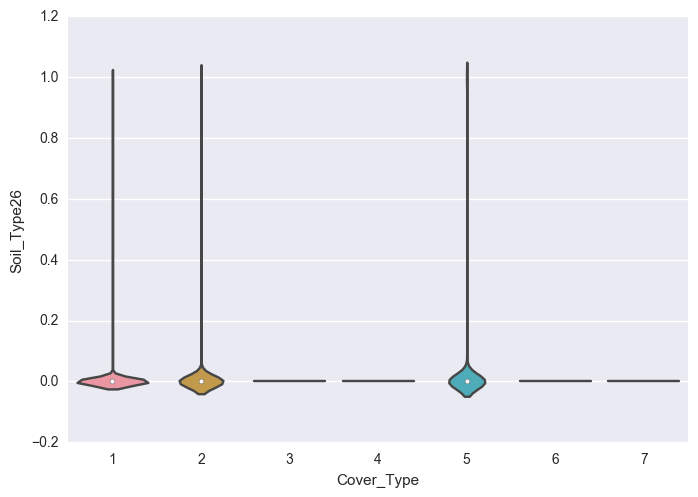

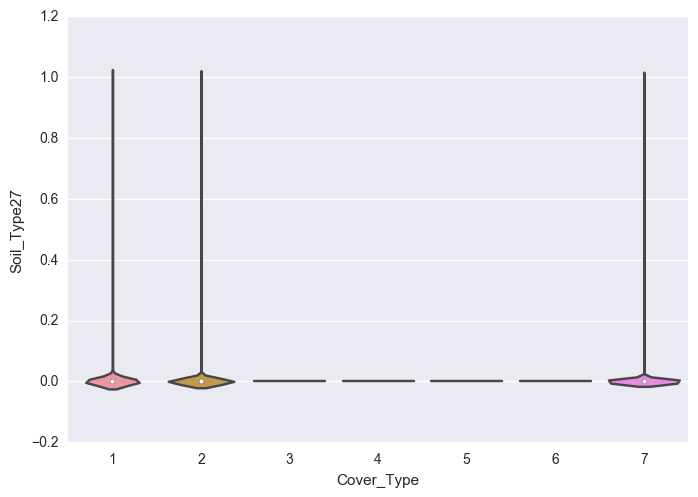

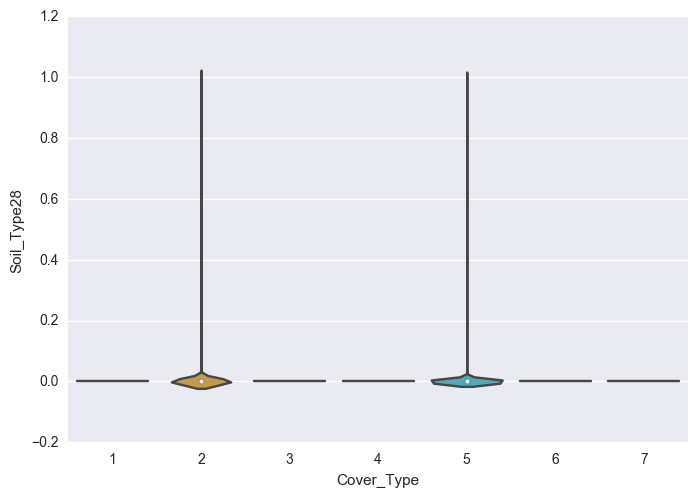

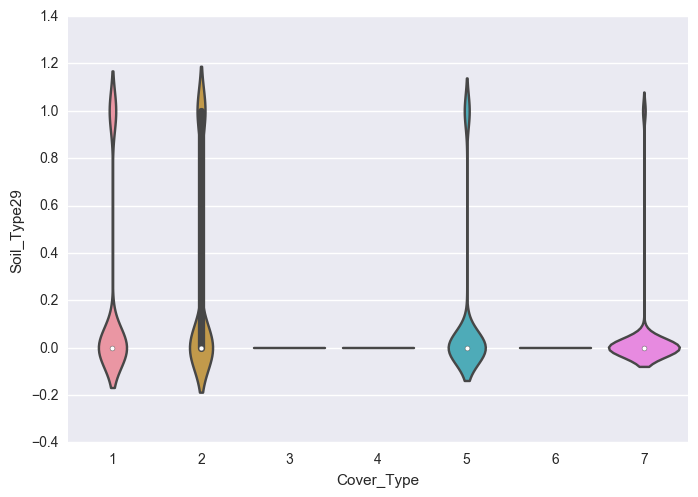

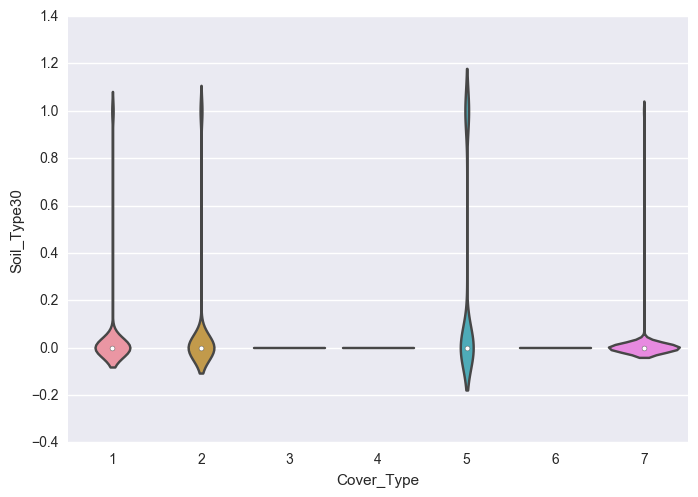

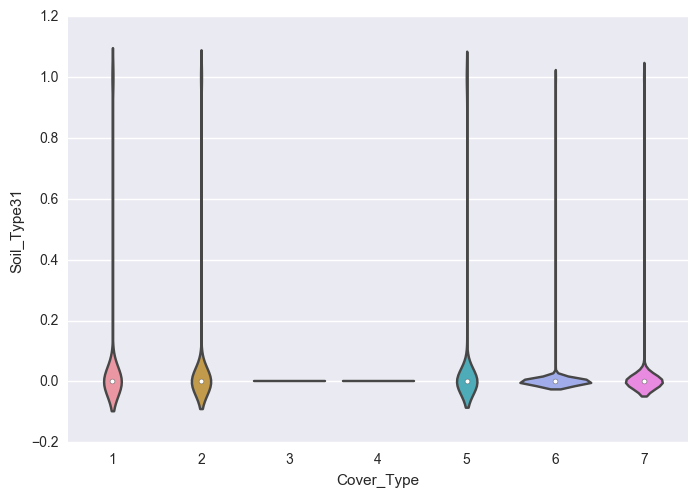

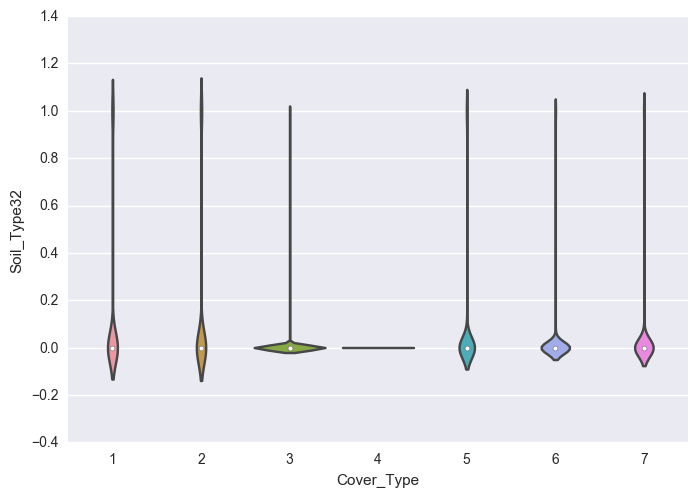

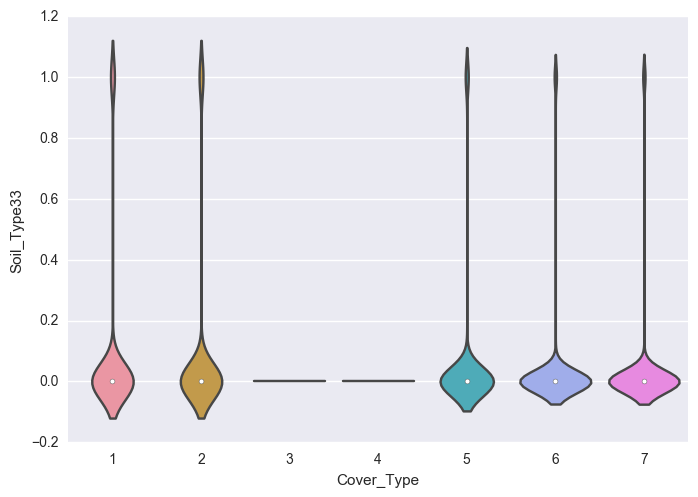

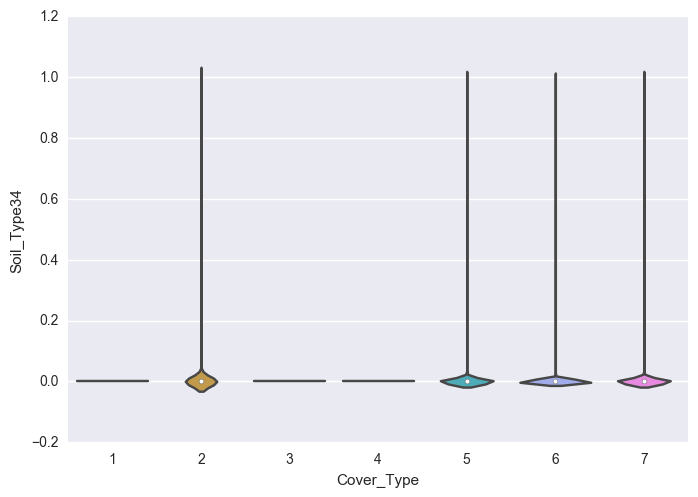

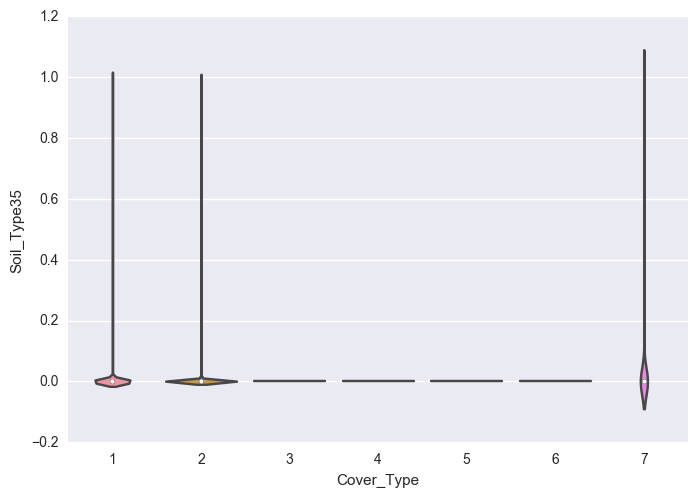

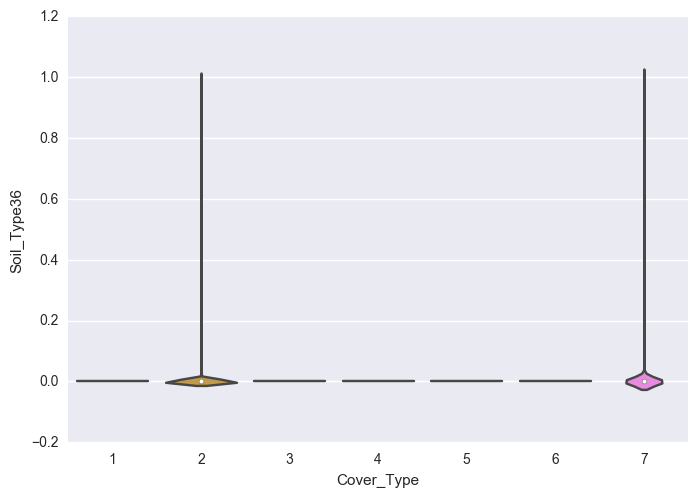

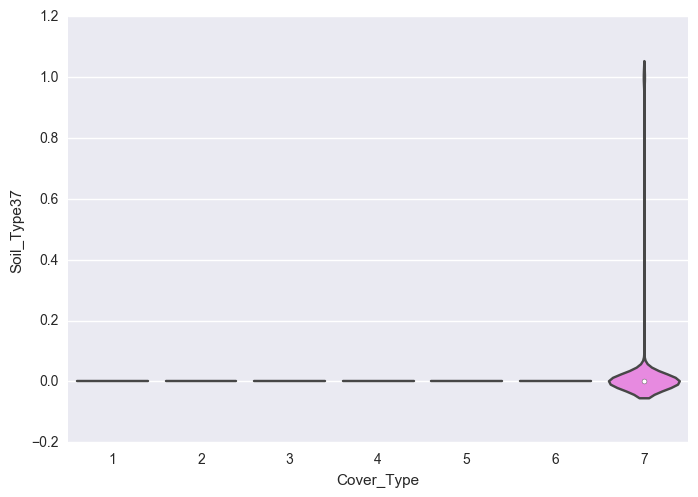

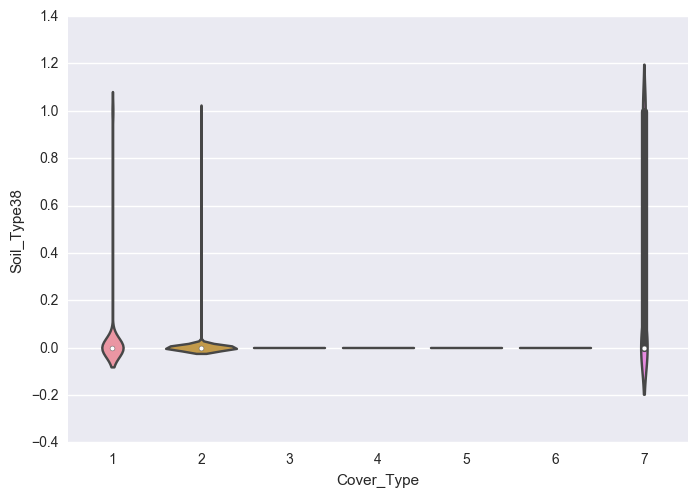

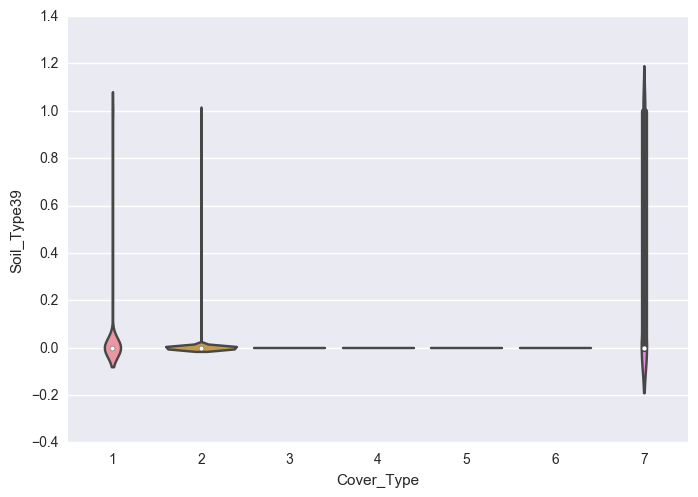

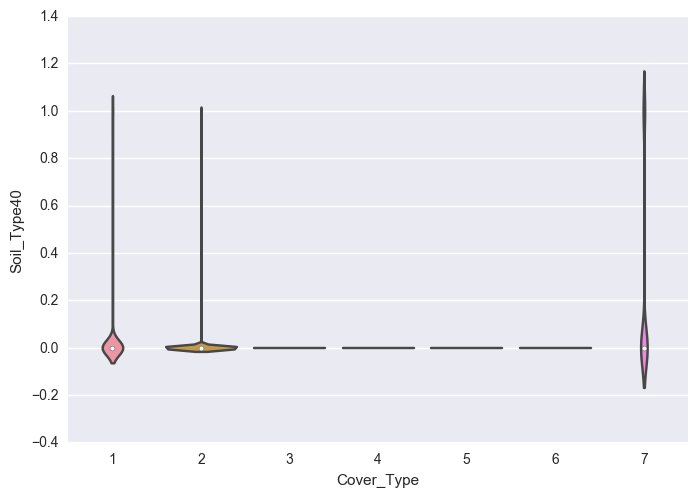

In [15]:
#We will visualize all the attributes using Violin Plot - a combination of box and density plots

#names of all the attributes 
cols = dataset.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=dataset,x=x,y=y[i])  
    plt.show()

#Elevation is has a separate distribution for most classes. Highly correlated with the target and hence an important attribute
#Aspect contains a couple of normal distribution for several classes
#Horizontal distance to road and hydrology have similar distribution
#Hillshade 9am and 12pm display left skew
#Hillshade 3pm is normal
#Lots of 0s in vertical distance to hydrology
#Wilderness_Area3 gives no class distinction. As values are not present, others gives some scope to distinguish
#Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes

In [4]:
# Grouping of One hot encoded attributes
# Group one-hot encoded variables of a category into one single variable
import numpy

#names of all the columns
cols = dataset.columns

#number of rows=r , number of columns=c
r,c = dataset.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pandas.DataFrame(index=numpy.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 range
    for j in range(10,14):
        if (dataset.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Category2 range        
    for k in range(14,54):
        if (dataset.iloc[i,k] == 1):
            s=k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,dataset.iloc[i,c-1]]

In [5]:
data

,Wilderness_Area,Soil_Type,Cover_Type
0,1,29,5
1,1,29,5
2,1,12,2
3,1,30,2
4,1,29,5
5,1,29,2
6,1,29,5
7,1,29,5
8,1,29,5
9,1,29,5
